# Libraries 

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore')

# Collect Data

In [2]:
train_data = pd.read_csv(r"Genre Classification Dataset\test_data_solution.txt",
                  sep=':::',names=['Title', 'Genre', 'Description']).reset_index(drop=True)
train_data.head()

,Title,Genre,Description
0,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [3]:
test_data = pd.read_csv(r"Genre Classification Dataset\test_data.txt",
                  sep=':::',names=['Title', 'Description']).reset_index(drop=True)
test_data.head()

,Title,Description
0,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,Er nu zhai (1955),Before he was known internationally as a mart...


# Data Cleaning

### For Train Data


In [4]:
train_data.describe(include='object').T

,count,unique,top,freq
Title,54200,54200,Edgar's Lunch (1998),1
Genre,54200,27,drama,13612
Description,54200,54072,Grammy - music award of the American academy ...,10


In [5]:
train_data.info() #No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54200 non-null  object
 1   Genre        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [6]:
train_data.duplicated().sum() #No duplicates

0

In [7]:
train_data.Genre.unique() #No anomalies values

array([' thriller ', ' comedy ', ' documentary ', ' drama ', ' horror ',
       ' short ', ' western ', ' family ', ' sport ', ' romance ',
       ' war ', ' game-show ', ' biography ', ' adult ', ' talk-show ',
       ' action ', ' music ', ' crime ', ' animation ', ' sci-fi ',
       ' adventure ', ' reality-tv ', ' fantasy ', ' mystery ',
       ' history ', ' news ', ' musical '], dtype=object)

### For Test Data

In [8]:
test_data.describe(include='object').T

,count,unique,top,freq
Title,54200,54200,Edgar's Lunch (1998),1
Description,54200,54072,Grammy - music award of the American academy ...,10


In [9]:
test_data.info() #No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54200 non-null  object
 1   Description  54200 non-null  object
dtypes: object(2)
memory usage: 847.0+ KB


In [10]:
test_data.duplicated().sum() #No duplicates

0

# Exploratory Data Analysis

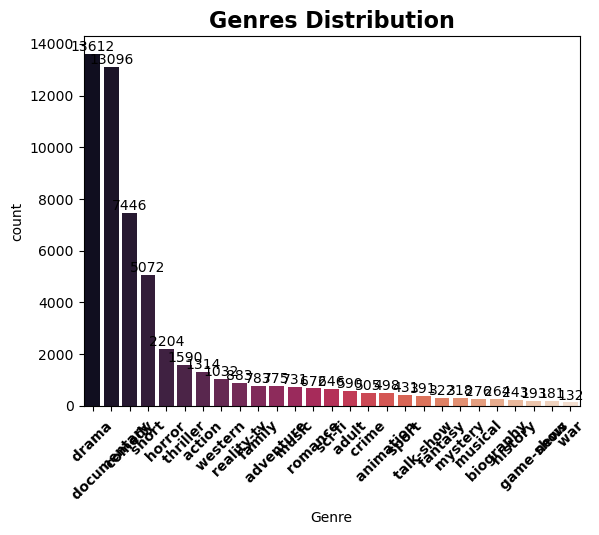

In [11]:
ax=sns.countplot(data=train_data,x='Genre',order=train_data.Genre.value_counts().index,palette='rocket')
ax.bar_label(ax.containers[0])
plt.title('Genres Distribution',fontweight='bold',fontsize=16)
plt.xticks(rotation=45,fontweight='bold',fontsize=10)
plt.show()

# Model Building

In [19]:
# Concatenate title and description for both train and test data
train_text = train_data['Title'] + ' ' + train_data['Description']
test_text = test_data['Title'] + ' ' + test_data['Description']

In [20]:
# Initialize TF-IDF vectorizer and fit it to the training text
tfidf_vectorizer = TfidfVectorizer(lowercase=True, ngram_range=(1,1), stop_words='english', min_df=2)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_text)

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, train_data['Genre'], test_size=0.2, random_state=42)

# Apply SMOTE to the training data to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [21]:
# Train Naive Bayes classifier on the resampled training data
model = MultinomialNB()
model.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [22]:
# Predict genre for test data
X_test_tfidf = tfidf_vectorizer.transform(test_text)
test_data['Predicted_Genre'] = model.predict(X_test_tfidf)

# Evaluate accuracy
accuracy = accuracy_score(train_data['Genre'], test_data['Predicted_Genre'])
print("Accuracy:", accuracy)

Accuracy: 0.7125276752767528


In [23]:
# Save the trained model to a .pkl file
with open('movie_genre_classification_model.pkl', 'wb') as file:
    pickle.dump((model, tfidf_vectorizer), file)
    